<a href="https://colab.research.google.com/github/mloyorev/Theory/blob/main/4_InventoryDynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
from numba import njit, int32

# **Solving the inventory model**

Given a demand $(D_{t})_{t\geq 0}$ and inventory $(X_{t})_{t\geq 0}$ process there's a **law of motion of invetory** described as

$$X_{t+1}=F(X_{t},A_{t},D_{t+1})$$

where $A_{t}$ is the stock ordered this period.

Particularly, the law of motion of invetories can be described as

$$F(X,A,D):=\max\left\{X-D,0\right\}+A$$

We assume that the firm can store at most $K$ items at one time, such that the **state space** is $X\in\left\{0,1,...,K\right\}$, and that $(D_{t})$ distributes as a random variable i.i.d. with distribution $\phi$.

**Profits** are given by

$$π_{t}=\min\left\{X_{t},D_{t+1}\right\}-cA_{t}-\kappa\left\{A_{t}>0\right\}$$

wich means that we assume that:


*   The price of each of the units of the invetory is equal to $1$.
*   The units of inventory sold are equal to $\min\left\{X_{t},D_{t+1}\right\}$.
*   There's a unit product cost denoted with $c$.
*    In case we order units of inventory, there's a fixed cost equal to $\kappa$.

Given all this assumptions, the **present value of the firm** is equal to

$$V_{0}=\mathbb{E}\sum_{t\geq 0}\beta^{t}π_{t}$$

Then, the **objective of the firm** is to maximize the present value of the firm.



The optimal present value of the firm comes from the **value function** given by:

$$V(x_{t})=\max_\left\{a_{t+s}\in\Gamma(x_{t+s})\right\} E_{t} \sum_{s=0}^{\infty}\beta^{s}π(x_{t+s},a_{t+s},d_{t+1+s})$$

where $a_{t+s}\in\Gamma(x_{t+s})$ implies that the stock orders must be feasible (that is $\Gamma(x_{t+s})=\left\{0,1,...,K-x_{t+s}\right\}$) and $E_{t}$ is the expected value conditional to what happens in $t$.

This equation can be expressed as

$$V(x_{t})=\max_\left\{a_{t+s}\in\Gamma(x_{t+s})\right\} \left\{E_{t}\pi(x_{t},a_{t},d_{t+1})+E_{t}\sum_{s=1}^{\infty}\beta^{s}π(x_{t+s},a_{t+s},d_{t+1+s})\right\}$$

and by assuming $E_{t}\pi(x_{t},a_{t},d_{t+1})=r(x_{t},a_{t})$, we have that

$$V(x_{t})=\max_\left\{a_{t+s}\in\Gamma(x_{t+s})\right\} \left\{r(x_{t},a_{t})+E_{t}\sum_{s=1}^{\infty}\beta^{s}π(x_{t+s},a_{t+s},d_{t+1+s})\right\}=\max_\left\{a_{t}\in\Gamma(x_{t})\right\} r(x_{t},a_{t})+\max_\left\{a_{t+s}\in\Gamma(x_{t+s})\right\}E_{t}\sum_{s=1}^{\infty}\beta^{s}π(x_{t+s},a_{t+s},d_{t+1+s}) $$

where $r(x_{t},a_{t})$ is the **expected current profit**.

By applying the **substitution** $s=k+1$ and factorizing $\beta$ form the second term on the RHS, we have that...

$$V(x_{t})=\max_\left\{a_{t}\in\Gamma(x_{t})\right\} r(x_{t},a_{t})+\max_\left\{a_{t+k+1}\in\Gamma(x_{t+k+1})\right\}E_{t}\sum_{k=0}^{\infty}\beta^{k+1}π(x_{t+k+1},a_{t+k+1},d_{t+k+2}) $$

$$V(x_{t})=\max_\left\{a_{t}\in\Gamma(x_{t})\right\} r(x_{t},a_{t})+\max_\left\{a_{t+k+1}\in\Gamma(x_{t+k+1})\right\}\beta E_{t}\sum_{k=0}^{\infty}\beta^{k}π(x_{t+k+1},a_{t+k+1},d_{t+k+2}) $$

According to the **law of iterated expectations**, we obtain that$^{1}$...

$$V(x_{t})=\max_\left\{a_{t}\in\Gamma(x_{t})\right\} r(x_{t},a_{t})+\max_\left\{a_{t+k+1}\inΓ(x_{t+1+k})\right\} \beta\sum_{d_{t+2}}E_{t+1}\left[\sum_{k=0}^{\infty}\beta^{k}π(x_{t+k+1},a_{t+k+1},d_{t+k+2})\right]f(d_{t+2}|d_{t+1})$$

where $f(d_{t+2}|d_{t+1})$ probability distribution function of $d_{t+2}$ given $d_{t+1}$.

Since each of the shock values ​​defines a particular mathematical object, the **maximization of the sum is the sum of the maximizations**....

$$V(x_{t})=\max_\left\{a_{t}\in\Gamma(x_{t})\right\} r(x_{t},a_{t})+\beta\sum_{d_{t+2}}\max_\left\{a_{t+k+1}\inΓ(x_{t+1+k})\right\} E_{t+1}\left[\sum_{k=0}^{\infty}\beta^{k}π(x_{t+k+1},a_{t+k+1},d_{t+k+2})\right]f(d_{t+2}|d_{t+1})$$

However, by the **definition of the value function** and according to the assumtions of the model, we have that the **bellman equation** is...

$$V(x_{t})=\max_\left\{a_{t}\in\Gamma(x_{t})\right\} r(x_{t},a_{t})+\beta\sum_{d_{t+2}}V(x_{t+1})\phi(d_{t+2})$$


Therefore...


1.   The **Bellman operator** is...

$$TV(x)=\max_\left\{a\in\Gamma(x)\right\} r(x,a)+\beta\sum_{d'}V(F(x,a,d'))\phi(d')$$


2.   The **$v$-greedy policy** is

$$\sigma^{*}(x)\in\text{argmax}_{\left\{a\in\Gamma(x)\right\}}\left\{r(x,a)+\beta\sum_{d'}V(F(x,a,d'))\phi(d')\right\}$$



We solve the inventory model **using the value function iterion (VFI) algorithm**.


We define a function that returns the index of the maximum element on a list

In [27]:
@njit # The function is compiled using numba's Just-In-Time compiler

def argmax(list_object):
  max_val = -np.inf    # Initialize the maximum value
  argmax_index = None  # Initialize the index of the maximum value
  for i, x in enumerate(list_object): # Initialize a loop for each pair (i,x) in enumerate(list_object)
    if x > max_val:      # If an (i,x) satisfies that x > max_ val, then: - max_val = x
      max_val = x        #                                                - arg_max = i
      argmax_index = i
  return argmax_index

We also use the **succesive aproximation function**, as defined on the previous notebook.

In [28]:
def succesive_approx(T,                # Operator
                     x_0,              # Initial condition
                     tol=1e-6,         # Error tolerance
                     max_iter=10_000,  # Maximum number of iteration
                     print_step=25,    # Frequency with which progress messages will be printed during iterations
                     verbose=False):   # Will not print progress messages during iterations

  x = x_0           # Initialize: - Initial condition
  error = tol + 1   #             - Error
  k = 1             #             - Number of iterations

  while error > tol and k <= max_iter:    # Initialize a bucle that keeps iterating while error > tol and k <= max_iter
    x_new = T(x)                          # Apply transformation
    error = np.max(np.abs(x_new - x))     # Gets the error with the supremum norm

    if verbose and k % print_step == 0:                      # If verbose=True and k is a multiple of print_step, progress message is printed
      print(f"Completed iteration {k} with error {error}.")

    x = x_new    # Update: - Initial condition
    k +=1        #         - Number of iterations

  if error > tol:
    print(f"Warning: Iteration hit upper bound {max_iter}.")
  elif verbose:
    print(f"Terminanted succesufully in {k} iterations.")

  return x

To **store our model parameters**, we use a namedtuple. Here we define the namedtuple and a function to create instances with default values.

In [29]:
Model = namedtuple('Model', ('beta',    # Discount factor
                             'kappa',   # Maximum inventory capacity
                             'c',       # Unit cost of stock
                             'K',       # Fixed cost of ordering stock
                             'p',       # Demand probability mass function parameter
                             'phi',     # Demanda probability mass function
                             'Gamma'))  # Feasible space for stock

def create_inventory_model(r=0.02,   # Interest rate
                           kappa=40, # Maximum inventory
                           c=0.2,    # Cost parameter
                           K=2,      # Cost parameter
                           p=0.6):   # Demand parameter

  # Define the discount factor
  beta = 1 / (1+r)

  # Define a geometric distribution on d = 0, 1, 2, ... with parameter p
  @njit
  def phi(d):
    return (1 - p) ** d * p

  # Define a feasible correspondence of space at the inventory
  @njit
  def Gamma(x):
    return range(kappa - x + 1)

  return Model(beta=beta, kappa=kappa, c=c, K=K, p=p, phi=phi, Gamma=Gamma)

It is important to notice that in order to solve the model used the vfi algorithm it is necessary to test the **Blackwell sufficiency conditions**.

### **1. Monotonicity**

Let $V,W$ two different functions that satisfies that $V(x)≤W(x)
$ $∀x$. If we name $x'$ the inventory of the next period, resvectively, then...

$$V(x')≤W(x'),  ∀x'$$

If we multiply both sides of the inequality by the function of the demand level probability, then...

$$V(x')\phi (d)≤W(x')\phi (d),  ∀x'$$

The inequality also holds for the expected value of value functions, such that...

$$\sum_{d}V(x')\phi (d)≤\sum_{d}W(x')\phi (d)$$
$$β\sum_{d}V(x')Q(d)≤β\sum_{d}W(x')\phi (d)$$

Finally we add both sides the maximization of the current output given a particular level of inventory, such that...

$$\max_{a}r(x,a)+β\sum_{d}V(x')\phi (d)≤\max_{a}r(r,a)+β\sum_{d}W(x')\phi(d),  ∀x$$

Therefore, $T(V(x))≤T(x)), ∀x$, which means that the transformation satisifes monotonicity.

### **2. Discounting**

Let's consider a value function $V$ and a positive constant $a$, such that...

$$T(V(x)+a)=max_{a}r(x,a)+β∑_{d}(V(x')+a)\phi(d)$$

\

$$T(V(x)+a)=max_{a}r(x,a)+β∑_{d}(V(x'))\phi(d)+β∑_{d}a\phi(d)$$

\

$$T(V(x)+a)=max_{a}r(x,a)+β∑_{d}(V(x'))\phi(d)+aβ∑_{d}\phi(d)$$

it is fulfilled that $∑_{d}\phi(d)=1$, such that...

$$T(V(x)+a)=max_{a}r(x,a)+β∑_{d}(V(x'))\phi (d)+aβ$$

\

$$T(V(x)+a)=T(V(x))+aβ$$

Therefore, $T(V(x)+a)≤T(V(x))+aβ$, which means that the transformation satisfies discounting.


Since the Bellman equation satisfies the **Blackwell sufficiency conditions**, now we are sure that the model can be solved with the **vfi algorithm**.

The next function computes the **Bellman equation**, which is:

$$B(x,a,v):=r(x,a)+\beta∑_{d'}v[F(x,a,d')]\phi(d')=\text{profit}+\beta\cdot\text{continuation value}$$

In [30]:
@njit
def B(x, a, v, model, d_max=100):
  beta, kappa, c, K, p, phi, Gamma = model  # Unpacked model parameters

  expected_revenue   = sum([min(x,d) * phi(d) for d in range(d_max)])
  profit             = expected_revenue - c * a - K * (a > 0)                      # Expected current profit
  continuation_value = sum([v[max(x - d, 0) + a] * phi(d) for d in range(d_max)])  # Expected value of the next period's inventory

  return profit + beta * continuation_value


Now we introduce the **Bellman operator**.

In [31]:
@njit
def T(v,model):
  beta, kappa, c, K, p, phi, Gamma = model  # Unpacked model parameters

  new_v = np.empty_like(v)                                 # Initialize a vector of values of the same dimensions as v

  for x in range(kappa + 1):                               # Updates the empty vector of values by maximizing the Bellman equation
    new_v[x] = max([B(x, a, v, model) for a in Gamma(x)])
  return new_v

Then we introduce a function that computes the **$v$-greedy policy** given $v$.

In [32]:
@njit
def get_greedy(v,model):
  beta, kappa, c, K, p, phi, Gamma = model  # Unpacked model paramters

  sigma = np.empty_like(v, dtype=int32)                       # Initialize a vector of values of the same dimensions as v

  for x in range(kappa + 1):                                  # Find the argument that maximize the Bellman equation at each position
    sigma[x] = argmax([B(x, a, v, model) for a in Gamma(x)])
  return sigma

The function below **applies VFI** algorithm.

In [33]:
def vfi(v_init, model):
  v_star = succesive_approx(lambda v: T(v,model), v_init)
  sigma_star = get_greedy(v_star, model)
  return v_star, sigma_star

Now, let's test this functions.

In [34]:
model = create_inventory_model()
beta, kappa, c, K, p, phi, Gamma = model
v_init = np.zeros(kappa + 1)

In [35]:
v_star, sigma_star = vfi(v_init, model)

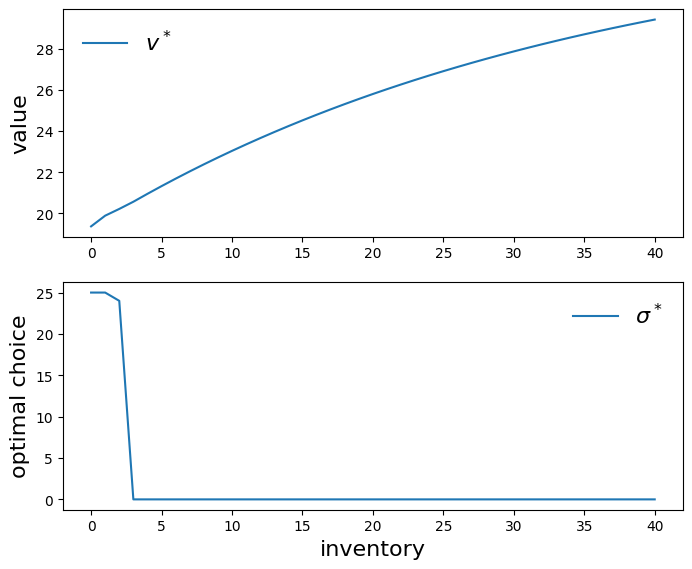

In [43]:
def plot_optimal_values(kappa, v_star, sigma_star):
    fig, axes = plt.subplots(2, 1, figsize=(8, 6.5))
    fontsize = 16

    ax = axes[0]
    ax.plot(range(kappa + 1), v_star, label="$v^*$")
    ax.set_ylabel("value", fontsize=fontsize)
    ax.legend(fontsize=fontsize, frameon=False)

    ax = axes[1]
    ax.plot(range(kappa + 1), sigma_star, label="$\\sigma^*$")
    ax.set_xlabel("inventory", fontsize=fontsize)
    ax.set_ylabel("optimal choice", fontsize=fontsize)
    ax.legend(fontsize=fontsize, frameon=False)

    plt.show()

plot_optimal_values(kappa, v_star, sigma_star)

Additionaly we can compute a function that **simulate inventories** under the optimal policy.

In [37]:
@njit
def sim_inventories(parameters, sigma_star, time_length=100, X0=0):
  X = np.zeros(time_length, dtype=int32)
  X[1] = X0
  for t in range (time_length-1):
    D = np.random.geometric(parameters.p) - 1
    X[t+1] = max(X[t] - D, 0) + sigma_star[X[t]]
  return X


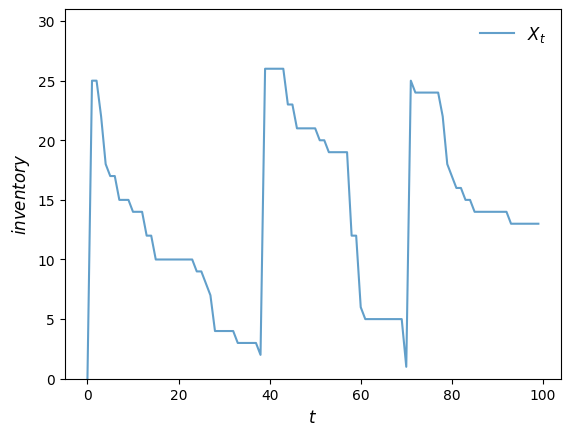

In [46]:
def plot_inventory_simulation(X):
    fig, ax = plt.subplots()
    ax.plot(X, label="$X_t$", alpha=0.7)
    ax.set_xlabel("$t$", fontsize=12)
    ax.set_ylabel("$inventory$", fontsize=12)
    ax.legend(fontsize=12, frameon=False)
    ax.set_ylim(0, np.max(X) + 5)
    plt.show()

X = sim_inventories(model, sigma_star)
plot_inventory_simulation(X)

Given all this functions we can create a function that **solves and simulate** the inventory dynamics for any set of model parameters.

In [57]:
def inventory_model(parameters):
  # STEP I: Unpacked model paramters
  beta, kappa, c, K, p, phi, Gamma = parameters

  # STEP II: Initialize the value function
  v0 = np.zeros(kappa + 1)

  # STEP III: Solves the model using VFI algorithm
  v, sigma = vfi(v0, parameters)

  # STEP IV: Plot optimal value function and choices
  A = plot_optimal_values(kappa, v, sigma)

  # STEP V: Plot the simulation of the inventory dynamics
  I = sim_inventories(parameters, sigma)
  B = plot_inventory_simulation(I)

  return A,B

In order to test this function let's imagine a case in which:


1.   There is a **lower discount factor**, such that $r=0.5$.
2.   There is **less capacity in inventories**, such that $\kappa=27$.
3.   There is a **greater fixed cost** of ordering more inventory stock, $K=4$.



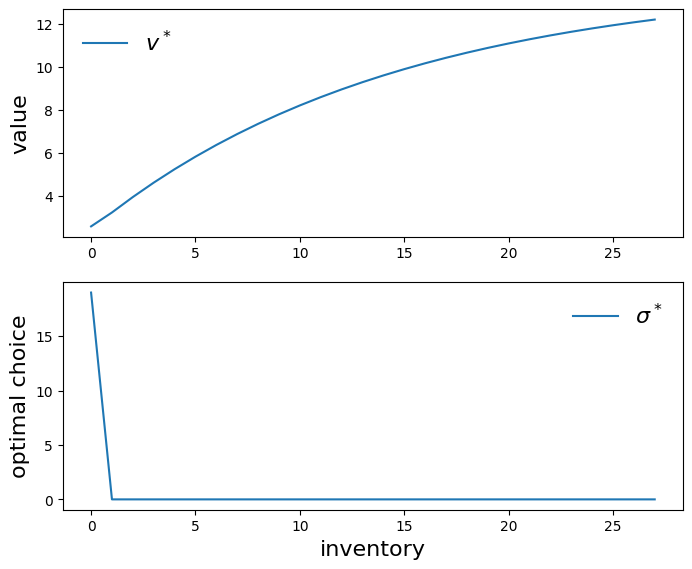

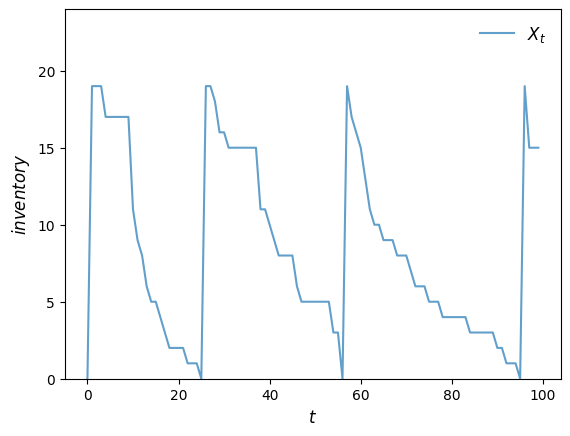

(None, None)

In [59]:
model1=create_inventory_model(r=0.05,kappa=27,K=4)
inventory_model(model1)

## **Appendix**

$^{1}$According to the **law of iterated expectations** the second term of the RHS can be simplified as:

$$E_{t}\sum_{k=0}^{\infty}\beta^{k}π_{t+k+1}=\sum_{d_{t+2}}\sum_{d_{t+3}}...\sum_{d_{t+k+2}}\left[\sum_{k=0}^{\infty}\beta^{k}\pi(x_{t+k+1},a_{t+k+1},d_{t+k+2})\right]f(d_{t+k+2}|d_{t+k+1})...f(d_{t+2}|d_{t+1})$$

or equivalently...

$$E_{t}\sum_{k=0}^{\infty}\beta^{k}π_{t+k+1}=\sum_{d_{t+2}}E_{t+1}\left[\sum_{k=0}^{\infty}\beta^{k}\pi(x_{t+k+1},a_{t+k+1},d_{t+k+2})\right]f(d_{t+2}|d_{t+1})$$